# Exploration du commerce de Dunkerque

In [36]:
import csv
import json
import pandas as pd
import numpy as np
import seaborn as sns
from os.path import join
from collections import Counter
from dunkerquesprint import get_online_csv

In [2]:
DUNKERQUE_UHGS_ID = 'A0204180'

## Chargement des données Navigo

In [3]:
NAVIGO = []

def filter_row(row):
    return row['destination_uhgs_id'] == DUNKERQUE_UHGS_ID or row['departure_uhgs_id'] == DUNKERQUE_UHGS_ID

navigo_source_files = [
    'navigo_all_flows_1787.csv',
    'navigo_all_flows_1789.csv'
]

for source_file in navigo_source_files:
    with open(join('../../data', source_file), encoding='utf8') as f:
        for row in csv.DictReader(f):
            if filter_row(row):
                NAVIGO.append(row)
                
            # Parsing cargo
            if row['all_cargos']:
                row['cargo'] = [c['commodity_purpose'] for c in eval(row['all_cargos'])]
            else:
                row['cargo'] = []

len(NAVIGO)

5219

In [4]:
COMMODITIES_TO_DUNKERQUE = Counter()
COMMODITIES_FROM_DUNKERQUE = Counter()

for row in NAVIGO:    
    for commodity in row['cargo']:
        target = COMMODITIES_TO_DUNKERQUE if row['destination_uhgs_id'] == DUNKERQUE_UHGS_ID else COMMODITIES_FROM_DUNKERQUE
        target[commodity] += 1

In [5]:
COMMODITIES_TO_DUNKERQUE.most_common(10)

[('sel', 157),
 ('Sel', 94),
 ('Vin', 56),
 ('Sucre', 13),
 ('Autres', 8),
 ('Lest', 8),
 ('Café', 8),
 ('Autres marchandises', 7),
 ('Barriques vides', 7),
 ('Eau de vie', 6)]

In [6]:
COMMODITIES_FROM_DUNKERQUE.most_common(10)

[('Lège', 2437),
 ('Etc.', 879),
 ('Genevre', 802),
 ('Autres marchandises', 185),
 ('genevre', 137),
 ('Sucre', 122),
 ('Eau de vie', 98),
 ('Tabac', 94),
 ('autres marchandises', 67),
 ('faire la pêche', 62)]

## Données de pêche

In [7]:
PECHE_DATA = get_online_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSRy3fIKwWXSRg4QI_A9sQRNmWKnsNSA-TpgMenVz0twxfRmJGiFKN8Q8VSpBwxNw/pub?gid=351410703&single=true&output=csv')

for row in PECHE_DATA:
    for k, v in row.items():
        row[k] = int(v) if v else np.nan

In [29]:
BOATS_DATA = get_online_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQlb_8OTEZO-cJaY_crWl-HGno5c8Sm4sEUEHXCOgOxXN9bPX-VPpzkEFwlC6tjaZhUdHAkrvIzs6Rc/pub?gid=0&single=true&output=csv')

for row in BOATS_DATA:
    for k, v in row.items():
        row[k] = (float(v) if v else np.nan) or np.nan

In [9]:
df_peche = pd.DataFrame(data=PECHE_DATA)
df_peche.head(10)

,Année,Islande,Hitlande,Hareng,Terre-Neuve,Dogre Banc
0,1763,81891,64269,355800,NaN,NaN
1,1764,214218,81549,480560,NaN,NaN
2,1765,411990,91178,361658,NaN,NaN
3,1766,515301,49516,205002,NaN,NaN
4,1767,470314,67666,373652,NaN,NaN
5,1768,496928,71727,201899,NaN,NaN
6,1769,547641,96073,179246,NaN,NaN
7,1770,589933,68194,164453,72563.0,6636.0
8,1771,541443,60004,84318,106543.0,3240.0
9,1772,622111,67587,102971,45515.0,NaN


In [32]:
df_boats = pd.DataFrame(data=BOATS_DATA)
df_boats.head(10)

,Années,Dogres nb,Corvettes nb,Chasseurs nb,Total nb,Dogres tons,Corvettes tons,Chasseurs tons,Total tons
0,1763.0,6.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN
1,1764.0,23.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN
2,1765.0,42.0,NaN,NaN,42.0,NaN,NaN,NaN,NaN
3,1766.0,40.0,24.0,NaN,64.0,NaN,NaN,NaN,NaN
4,1767.0,43.0,19.0,NaN,62.0,NaN,NaN,NaN,NaN
5,1768.0,42.0,25.0,NaN,67.0,NaN,NaN,NaN,NaN
6,1769.0,39.0,22.0,3.0,64.0,NaN,NaN,NaN,NaN
7,1770.0,26.0,19.0,1.0,46.0,2.381,0.793,0.80,3.974
8,1771.0,26.0,25.0,1.0,52.0,2.325,0.944,0.15,3.419
9,1772.0,29.0,29.0,2.0,60.0,2.685,1.050,0.13,3.865


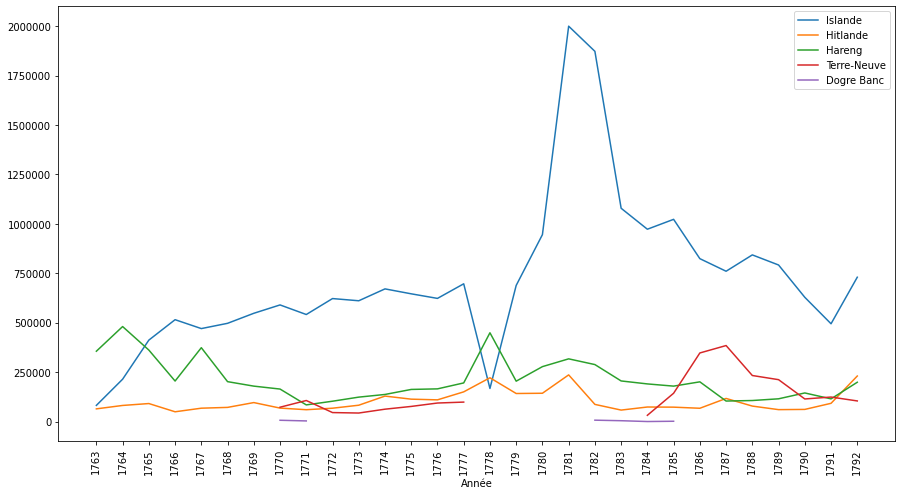

In [33]:
ax = df_peche.plot.line(figsize=(15, 8), x='Année')
ax.set_xticks(df_peche['Année'])
ax.set_xticklabels(df_peche['Année'], rotation=90)
ax.yaxis.set_major_formatter(lambda x, y: int(x))
None

In [34]:
islande_df = pd.DataFrame(data={
    'year': df_peche['Année'],
    'value': df_peche['Islande'],
    'boats': df_boats['Total nb'],
    'tons': df_boats['Total tons']
})
islande_df.head(10)

,year,value,boats,tons
0,1763,81891,6.0,NaN
1,1764,214218,23.0,NaN
2,1765,411990,42.0,NaN
3,1766,515301,64.0,NaN
4,1767,470314,62.0,NaN
5,1768,496928,67.0,NaN
6,1769,547641,64.0,NaN
7,1770,589933,46.0,3.974
8,1771,541443,52.0,3.419
9,1772,622111,60.0,3.865


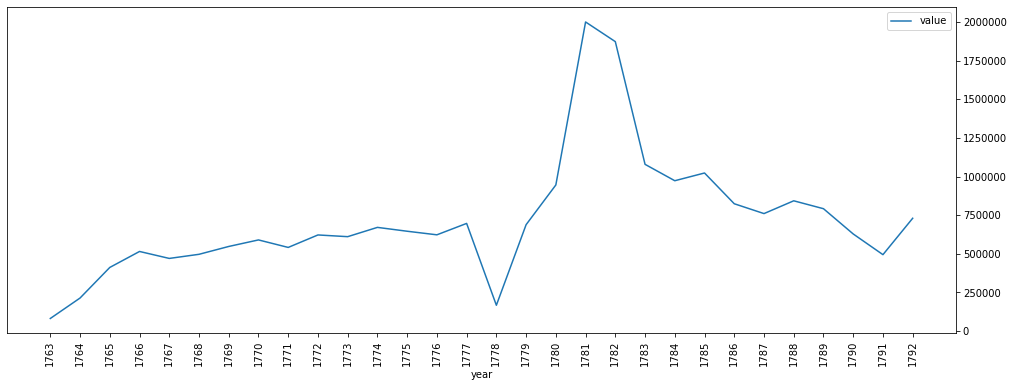

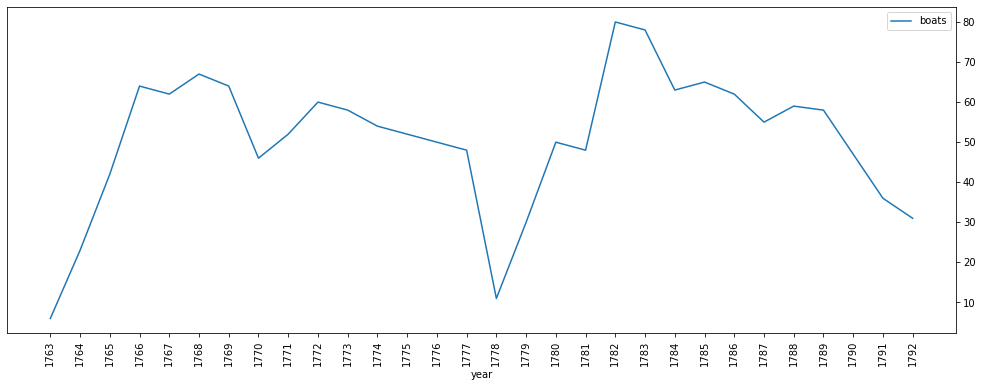

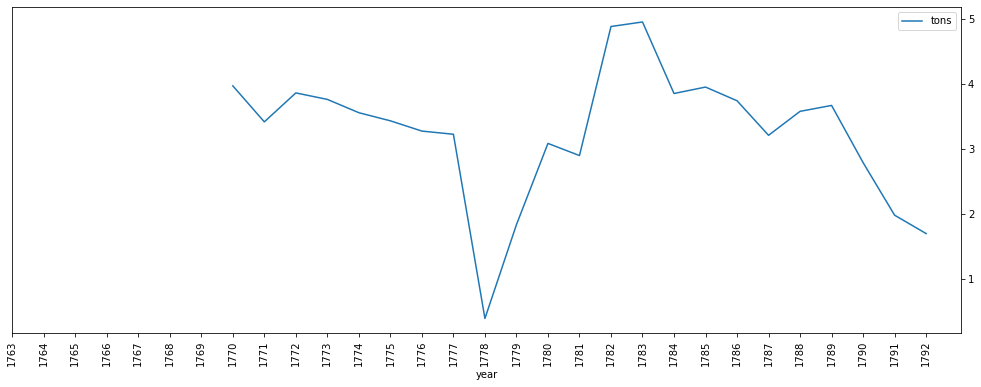

In [47]:
def draw_line(col):
    ax = islande_df.plot.line(figsize=(17, 6), x='year', y=col)
    ax.set_xticks(islande_df['year'])
    ax.set_xticklabels(islande_df['year'], rotation=90)
    ax.yaxis.set_major_formatter(lambda x, y: int(x))
    ax.yaxis.tick_right()
    
draw_line('value')
draw_line('boats')
draw_line('tons')